In [1]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, TrainingArguments, Trainer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

model = AutoModelForQuestionAnswering.from_pretrained("distilbert/distilbert-base-uncased")

c:\Users\yaoji\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
import pandas as pd
df = pd.read_csv('../question_answer_pair_2.csv')
df_context = pd.read_csv('../abstractive_summaries.csv')
merged_df = pd.merge(df, df_context, on='Topic', how='left')
merged_df

,Topic,TaggedSentence,Answer,Question,Label,Abstractive Summary
0,-1,The [HL] development [HL] of highly immunogeni...,development,What is critical for controlling the COVID-19 ...,pandemic_covid19_infection,The development of highly immunogenic and safe...
1,-1,The development of highly immunogenic and safe...,immunogenic vaccines,The development of highly immunogenic and safe...,pandemic_covid19_infection,The development of highly immunogenic and safe...
2,-1,The development of highly immunogenic and safe...,be critical,What will the development of highly immunogeni...,pandemic_covid19_infection,The development of highly immunogenic and safe...
3,-1,No one [HL] type [HL] of vaccine will likely f...,type,What type of vaccine will likely fill the glob...,pandemic_covid19_infection,The development of highly immunogenic and safe...
4,-1,No one type of [HL] vaccine [HL] will likely f...,vaccine,What type of vaccine will likely fill the glob...,pandemic_covid19_infection,The development of highly immunogenic and safe...
...,...,...,...,...,...,...
1425,155,Half of our [HL] patients [HL] had comorbiditi...,patients,How many patients had comorbidities?,covid19_fever_pneumonia,The first Covid-19 listed studies with pediatr...
1426,155,Half of our patients [HL] had [HL] comorbiditi...,had,Half of our patients had what type of comorbid...,covid19_fever_pneumonia,The first Covid-19 listed studies with pediatr...
1427,155,The long-[HL] term impact [HL] of neurological...,term impact,What is uncertain about the long term impact o...,covid19_fever_pneumonia,The first Covid-19 listed studies with pediatr...
1428,155,The long-term impact of [HL] neurological dama...,neurological damage,What is uncertain about the long-term impact o...,covid19_fever_pneumonia,The first Covid-19 listed studies with pediatr...


In [ ]:
merged_df = merged_df.rename(columns={"Answer": "answers", "Question" : "question", "Abstractive Summary" : "context"})

# Convert the updated DataFrame to a list of dictionaries for question-answering
qa_data_cleaned = merged_df[['question', 'answers', 'context']]

In [12]:
qa_data_cleaned['answers'] = qa_data_cleaned['answers'].astype(str)
qa_data_cleaned['question'] = qa_data_cleaned['question'].astype(str)
qa_data_cleaned['context'] = qa_data_cleaned['context'].astype(str)

C:\Users\yaoji\AppData\Local\Temp\ipykernel_23232\2725166270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qa_data_cleaned['answers'] = qa_data_cleaned['answers'].astype(str)
C:\Users\yaoji\AppData\Local\Temp\ipykernel_23232\2725166270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qa_data_cleaned['question'] = qa_data_cleaned['question'].astype(str)
C:\Users\yaoji\AppData\Local\Temp\ipykernel_23232\2725166270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [13]:
import pandas as pd

# Assuming df is your pandas DataFrame

# Define a function to find the start position of the answer in the context
def find_answer_start(context, answer):
    return context.find(answer)

# Adjust the 'answers' column to match the expected structure
qa_data_cleaned['answers'] = qa_data_cleaned.apply(lambda row: {'text': [row['answers']], 'answer_start': [find_answer_start(row['context'], row['answers'])]}, axis=1)

# Show the updated DataFrame
qa_data_cleaned

C:\Users\yaoji\AppData\Local\Temp\ipykernel_23232\775699054.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qa_data_cleaned['answers'] = qa_data_cleaned.apply(lambda row: {'text': [row['answers']], 'answer_start': [find_answer_start(row['context'], row['answers'])]}, axis=1)


,question,answers,context
0,What is critical for controlling the COVID-19 ...,"{'text': ['development'], 'answer_start': [4]}",The development of highly immunogenic and safe...
1,The development of highly immunogenic and safe...,"{'text': ['immunogenic vaccines'], 'answer_sta...",The development of highly immunogenic and safe...
2,What will the development of highly immunogeni...,"{'text': ['be critical'], 'answer_start': [61]}",The development of highly immunogenic and safe...
3,What type of vaccine will likely fill the glob...,"{'text': ['type'], 'answer_start': [119]}",The development of highly immunogenic and safe...
4,What type of vaccine will likely fill the glob...,"{'text': ['vaccine'], 'answer_start': [47]}",The development of highly immunogenic and safe...
...,...,...,...
1425,How many patients had comorbidities?,"{'text': ['patients'], 'answer_start': [49]}",The first Covid-19 listed studies with pediatr...
1426,Half of our patients had what type of comorbid...,"{'text': ['had'], 'answer_start': [108]}",The first Covid-19 listed studies with pediatr...
1427,What is uncertain about the long term impact o...,"{'text': ['term impact'], 'answer_start': [224]}",The first Covid-19 listed studies with pediatr...
1428,What is uncertain about the long-term impact o...,"{'text': ['neurological damage'], 'answer_star...",The first Covid-19 listed studies with pediatr...


In [14]:
def preprocess_function(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=384,
        truncation="only_second",
        return_offsets_mapping=True,
        padding="max_length",
    )

    offset_mapping = inputs.pop("offset_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        answer = answers[i]
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label it (0, 0)
        if offset[context_start][0] > end_char or offset[context_end][1] < start_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

In [15]:
from datasets import Dataset
data_dicts = qa_data_cleaned.to_dict('records')
dataset = Dataset.from_pandas(pd.DataFrame(data_dicts))
dataset = dataset.train_test_split(test_size=0.2)

tokenized_dataset = dataset.map(preprocess_function, batched=True, remove_columns=['question', 'answers', 'context'])

Map: 100%|██████████| 286/286 [00:00<00:00, 3479.37 examples/s]


In [19]:
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding

# Initialize the data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")

# Assuming `tokenized_dataset` is your DatasetDict after applying preprocess_function

# Convert the 'train' and 'test' splits to PyTorch DataLoader
train_dataloader = DataLoader(
    tokenized_dataset["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

validation_dataloader = DataLoader(
    tokenized_dataset["test"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

In [20]:
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="my_awesome_qa_model",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)



In [21]:
trainer.train()

 10%|█         | 72/720 [07:06<54:43,  5.07s/it]  

















                                                
                                               

 10%|█         | 72/720 [07:46<54:43,  5.07s/it]



{'eval_loss': 2.8694968223571777, 'eval_runtime': 39.98, 'eval_samples_per_second': 7.154, 'eval_steps_per_second': 0.45, 'epoch': 1.0}


 20%|██        | 144/720 [14:57<48:32,  5.06s/it]  

















                                                 
                                               

 20%|██        | 144/720 [15:37<48:32,  5.06s/it]



{'eval_loss': 2.5489442348480225, 'eval_runtime': 39.552, 'eval_samples_per_second': 7.231, 'eval_steps_per_second': 0.455, 'epoch': 2.0}


 30%|███       | 216/720 [22:44<42:43,  5.09s/it]  

















                                                 
                                               

 30%|███       | 216/720 [23:24<42:43,  5.09s/it]



{'eval_loss': 2.491870164871216, 'eval_runtime': 40.198, 'eval_samples_per_second': 7.115, 'eval_steps_per_second': 0.448, 'epoch': 3.0}


 40%|████      | 288/720 [30:31<36:25,  5.06s/it]  

















                                                 
                                               

 40%|████      | 288/720 [31:12<36:25,  5.06s/it]



{'eval_loss': 2.5751450061798096, 'eval_runtime': 40.367, 'eval_samples_per_second': 7.085, 'eval_steps_per_second': 0.446, 'epoch': 4.0}


 50%|█████     | 360/720 [38:17<30:11,  5.03s/it]  

















                                                 
                                               

 50%|█████     | 360/720 [38:57<30:11,  5.03s/it]



{'eval_loss': 2.695065975189209, 'eval_runtime': 40.121, 'eval_samples_per_second': 7.128, 'eval_steps_per_second': 0.449, 'epoch': 5.0}


 60%|██████    | 432/720 [46:02<24:15,  5.06s/it]  

















                                                 
                                               

 60%|██████    | 432/720 [46:42<24:15,  5.06s/it]



{'eval_loss': 2.8177661895751953, 'eval_runtime': 40.057, 'eval_samples_per_second': 7.14, 'eval_steps_per_second': 0.449, 'epoch': 6.0}


                                                   
 69%|██████▉   | 500/720 [53:28<21:45,  5.93s/it] 

{'loss': 2.0255, 'learning_rate': 6.111111111111112e-06, 'epoch': 6.94}


 70%|███████   | 504/720 [53:51<18:52,  5.25s/it]

















                                                 
                                               

 70%|███████   | 504/720 [54:31<18:52,  5.25s/it]



{'eval_loss': 2.9763457775115967, 'eval_runtime': 40.147, 'eval_samples_per_second': 7.124, 'eval_steps_per_second': 0.448, 'epoch': 7.0}


 80%|████████  | 576/720 [1:01:44<12:19,  5.14s/it]

















                                                   
                                               

 80%|████████  | 576/720 [1:02:24<12:19,  5.14s/it]



{'eval_loss': 3.115851879119873, 'eval_runtime': 40.099, 'eval_samples_per_second': 7.132, 'eval_steps_per_second': 0.449, 'epoch': 8.0}


 90%|█████████ | 648/720 [1:09:34<06:07,  5.10s/it]

















                                                   
                                                 

 90%|█████████ | 648/720 [1:10:14<06:07,  5.10s/it]



{'eval_loss': 3.1840434074401855, 'eval_runtime': 40.2367, 'eval_samples_per_second': 7.108, 'eval_steps_per_second': 0.447, 'epoch': 9.0}


100%|██████████| 720/720 [1:17:30<00:00,  5.03s/it]

















                                                   
                                                 

100%|██████████| 720/720 [1:18:10<00:00,  5.03s/it]

                                                   
100%|██████████| 720/720 [1:18:10<00:00,  6.51s/it] 

{'eval_loss': 3.281599521636963, 'eval_runtime': 39.862, 'eval_samples_per_second': 7.175, 'eval_steps_per_second': 0.452, 'epoch': 10.0}
{'train_runtime': 4690.4645, 'train_samples_per_second': 2.439, 'train_steps_per_second': 0.154, 'train_loss': 1.7181581285264758, 'epoch': 10.0}


TrainOutput(global_step=720, training_loss=1.7181581285264758, metrics={'train_runtime': 4690.4645, 'train_samples_per_second': 2.439, 'train_steps_per_second': 0.154, 'train_loss': 1.7181581285264758, 'epoch': 10.0})

In [31]:
question = "What are currently addicted to drugs?"
context = "More than 35 million people worldwide are currently addicted to drugs. COVID-19 has created new routes for drug trafficking that increase the risk of drug addiction, making it vital to address this problem. The aim is to effectively protect the [HL]physical health[HL] of PWUD and prevent the combination of CO VID-19 and the physiological and psychological effects of drugs from affecting relapse behaviour."

In [35]:
import torch
torch.save(model.state_dict(), '../model/model_weights_2.pth')

In [24]:
model = AutoModelForQuestionAnswering.from_pretrained("distilbert/distilbert-base-uncased")
model.load_state_dict(torch.load('../model/model_weights_2.pth'))
model.eval()

Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForQuestionAnswering(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
      

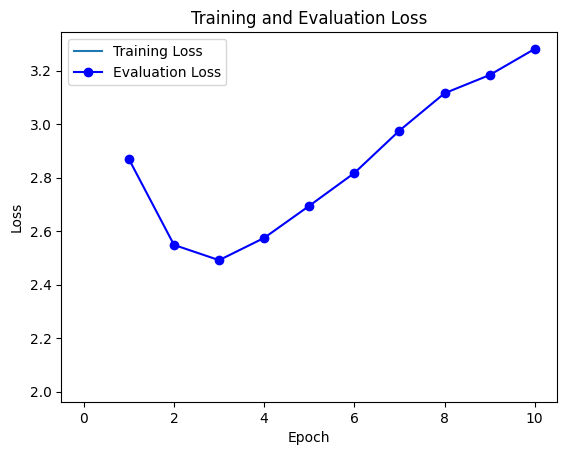

In [34]:
train_losses = [log['loss'] for log in trainer.state.log_history if 'loss' in log and 'eval_loss' not in log]
eval_losses = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]
eval_metrics = [log for log in trainer.state.log_history if 'eval_loss' in log]  # Includes all eval metrics

import matplotlib.pyplot as plt

# Plot training loss
plt.plot(train_losses, label='Training Loss')

# Since evaluation might happen less frequently, you might want to note these points specifically
epochs = range(1, len(eval_losses) + 1)
plt.plot(epochs, eval_losses, 'bo-', label='Evaluation Loss')

plt.title('Training and Evaluation Loss')
plt.xlabel('Step' if len(train_losses) > len(epochs) else 'Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [32]:
from transformers import pipeline

question_answerer = pipeline("question-answering", model=model, tokenizer=tokenizer)
question_answerer(question=question, context=context)

{'score': 0.1894567310810089, 'start': 38, 'end': 41, 'answer': 'are'}